##### ----------------------Notes---------------------
* This code uses regridded datafiles.

##### ------------------------------------------------

# Set up workspace

In [1]:
import sys
sys.path.append('../')

In [2]:
######################## Load modules ###################################
%matplotlib inline
import importlib
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

######################## Load package-specific modules ###################################
from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.generate_figures import quick_map
from plants_and_TCR.process_data import regrid_and_process_datafiles
from plants_and_TCR.process_data import make_processed_data_dict
from plants_and_TCR.analyze_data import multi_model_stats

####################### Set up directory structure ######################
PATH_REGRIDDED_DATA = directory_information.DIR_PROCESSED_DATA
PATH_FIGURES = directory_information.DIR_OUTPUT_FIGURES

# Analyze Data

In [3]:
END_YR=70
VARNAME='tas'
CMIP_NAMES=['CMIP6']

In [ ]:
# You only need to do this if you haven't already regridded temperature data for a different figure
regrid_and_process_datafiles.process_data(runname_inds=[3, 2, 1, 0],
                                          varname=VARNAME)

In [4]:
PROC_DATA_DICT = make_processed_data_dict.create_variable_dictionary(runnames=['piControl', '1pctCO2', 
                                                                               '1pctCO2-bgc', '1pctCO2-rad'],
                                                                     varname=VARNAME,
                                                                     input_path=PATH_REGRIDDED_DATA,
                                                                     cdict_names=['CMIP5','CMIP6'])

[ds_all_models_phys,
 multimodelSum_phys,
 positiveChangeCount_phys,
 negativeChangeCount_phys,
 num_models_with_data_phys] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                            varname=VARNAME,
                                                            end_yr=END_YR,
                                                            change_cutoff=0,
                                                            runname_inds=[2,0], #TOT-RAD: [2,0], PHYS-PI:[1,3]
                                                            cmip_names = CMIP_NAMES) 

[ds_all_models_rad,
 multimodelSum_rad,
 positiveChangeCount_rad,
 negativeChangeCount_rad,
 num_models_with_data_rad] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                           varname=VARNAME,
                                                            end_yr=END_YR,
                                                            change_cutoff=0,
                                                           runname_inds=[0,3], #[2,1], #TOT-PHYS: [2,1], RAD-PI: [0,3]
                                                          cmip_names = CMIP_NAMES)

std_ratio = (ds_all_models_phys['tas'].std(dim='modelname', skipna=True)/
             ds_all_models_rad['tas'].std(dim='modelname', skipna=True))

tas_1pctCO2-bgc_CMIP6_NorESM2-LM is not in the dictionary
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5


# Make Figure

../plants_and_TCR/generate_figures/quick_map.py:85: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(clim)


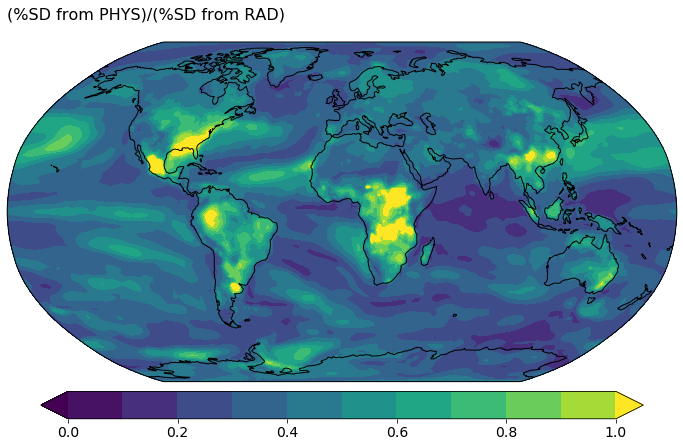

done saving file


(<Figure size 864x648 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f512de2af28>)

In [5]:
quick_map.quick_map(std_ratio.values,
                    std_ratio['lat'].values,
                    std_ratio['lon'].values,
                    clim=[0,1.1],
                    contours=True,
                    color_interval=0.1,
                    title='(%SD from PHYS)/(%SD from RAD)',
                    cmap=plt.cm.viridis,
                    filepath=PATH_FIGURES+'Figure6_uncertainty_ratio.png')